# Random Forest linear regressor with Single output using degree 1 polynomial input

In [23]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

from joblib import dump, load

In [7]:
pd.options.display.max_columns = 20000

Get the working directory

In [25]:
# Get the absolute path of the current working directory
current_dir = os.path.abspath(os.getcwd())

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

In [29]:
# Read in the input and output feather files
fp_input = os.path.join(parent_dir, 'data', 'input.feather')
fp_output = os.path.join(parent_dir, 'data', 'output_single.feather')

In [8]:
# Load the dataset using pandas
input = pd.read_feather(fp_input)
output = pd.read_feather(fp_output)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [9]:
# Create a random forest regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100)

# Train the random forest model with the training set
rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the mean squared error between the predicted and actual values
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest mean squared error:', mse_rf)

# Calculate the R-squared metric between the predicted and actual values
r2_rf = r2_score(y_test, y_pred_rf)
print('Random forest R-squared:', r2_rf)

C:\Users\Peter\AppData\Local\Temp\ipykernel_1652\3167798467.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random forest mean squared error: 10.523507409881022
Random forest R-squared: 0.8002478469987738


In [35]:
# Convert the y_test DataFrame to a Series
y_test = y_test.squeeze()
y_test

5152    20
1112    30
6399    38
4060    23
5613    20
        ..
8730    15
4245    17
7650    29
7181     6
8517    14
Name: number_of_lands, Length: 1860, dtype: int64

This code will create a scatter plot with the actual number of lands on the x-axis and the predicted number of lands by the neural network on the y-axis. The color of each point represents the difference between the predictions of the random forest model and the neural network model. The color bar on the right shows the range of values for the difference.

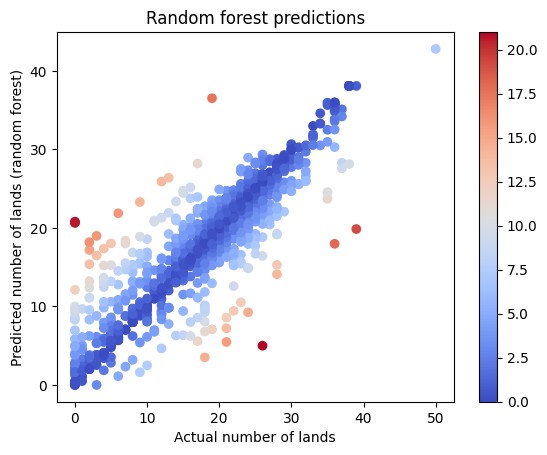

In [36]:
# Calculate the absolute difference between the predicted and actual values for the random forest model
diff_rf = np.abs(y_pred_rf - y_test)

# Convert the diff_rf array to a Pandas DataFrame and then to a Series with length of 1860
diff_rf_series = pd.DataFrame(diff_rf).squeeze()

# Create a scatter plot of the predicted values versus the actual values, color-coded by the absolute difference
plt.scatter(y_test, y_pred_rf, c=diff_rf_series, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Actual number of lands')
plt.ylabel('Predicted number of lands (random forest)')
plt.title('Random forest predictions')
plt.show()

This code will sort the diff_rf array in descending order of the absolute difference between the predicted and actual values using argsort(). Then, it selects the top 10 outliers with highest error by taking the first 10 indices of the sorted array. Finally, it uses the iloc method to access the corresponding rows in the X_test and y_test arrays for the outliers, and prints them to the console.

In [55]:
# Calculate the absolute difference between the predicted and actual values for the random forest model
diff_rf = np.abs(y_pred_rf - y_test)

# Get the indices of the sorted array in descending order of absolute difference
sorted_indices = np.argsort(diff_rf)[::-1]

# Get the input features and actual number of lands for the top 10 outliers with highest error
top_outliers_X = X_test.iloc[sorted_indices[:10], :]
top_outliers_y = y_test.iloc[sorted_indices[:10]]

# Print the top 10 outliers with highest error
print('Top 10 outliers with highest error:')
print(pd.concat([top_outliers_X, top_outliers_y], axis=1))

Top 10 outliers with highest error:
      avg_cmc  cast_cost_W  cast_cost_U  cast_cost_B  cast_cost_R  \
8114      3.7            1           71            0            0   
7818      3.1            0            0           58            0   
6466      1.5            0            0            0           42   
6718      3.4            0            0           19            0   
2214      7.2            0            4            0           22   
7429      3.7            2           36            2           17   
2865      3.9            8           47           26            4   
7997      2.3            4            0            0            4   
6865      2.6            0            0           42            0   
5589      1.4            0            8            0            0   

      cast_cost_G  cast_cost_C  cast_cost_P  produces_W  produces_U  \
8114            0            0            0           4           8   
7818            0            0            0           0       

This code will create an array y_pred_baseline with the constant value of 24, with the same shape as y_test. Then, it calculates the MSE between the actual number of lands in the decks and the predicted number of lands, which is the constant value of 24.

You can compare this MSE value with the MSE value of your random forest regressor to evaluate the performance of your model. If the MSE of your model is lower than the baseline MSE, then your model is performing better than the baseline assumption.

In [37]:
# Create an array of the constant value of 24, with the same shape as y_test
y_pred_baseline = np.full_like(y_test, 24)

# Calculate the MSE between the actual number of lands and the predicted number of lands (baseline assumption)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print('Baseline MSE:', mse_baseline)

Baseline MSE: 73.13655913978495


This code will extract the weights of the model's input layer and the first dense layer 
using the get_weights() method. Then, it calculates the absolute weights of the input features 
and multiplies them with the weights of the first dense layer to obtain the feature importances. 
The feature importances are then normalized and plotted in a bar chart with the feature names 
on the x-axis and the importance values on the y-axis.


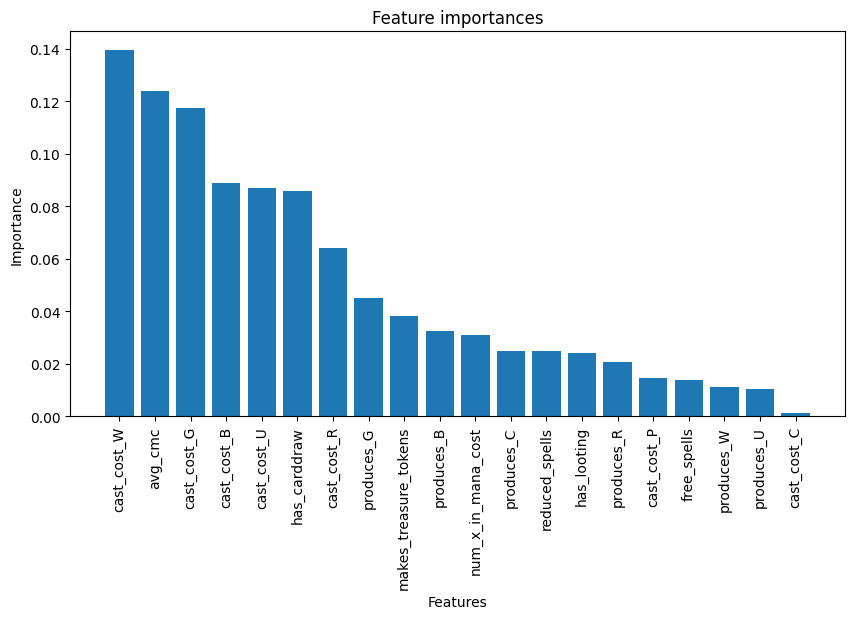

In [46]:
# Get the feature importances from the random forest regressor
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(input.shape[1]), importances[indices])
plt.xticks(range(input.shape[1]), input.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()

## Now lets try to train a model with polynomial features of varying degrees
We'll test the degrees from 2-5

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [10]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(input)

# Get the feature names from the PolynomialFeatures object
feature_names = poly.get_feature_names_out(input_features=input.columns)

# Create a new DataFrame with the polynomial features
input_poly = pd.DataFrame(poly_features, columns=feature_names)

In [18]:
degrees = list(range(2, 6))
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    rf_model_poly = RandomForestRegressor(n_estimators=100)

    rf_model_poly.fit(X_train_poly, y_train)

    y_train_pred = rf_model_poly.predict(X_train_poly)
    y_test_pred = rf_model_poly.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)


C:\Users\Peter\AppData\Local\Temp\ipykernel_24020\3164537207.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_poly.fit(X_train_poly, y_train)


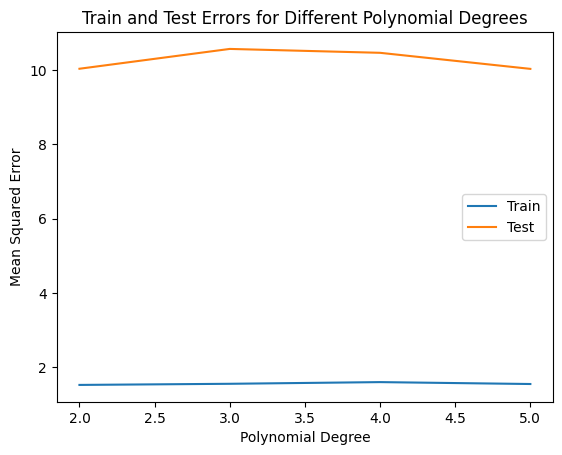

In [12]:
plt.figure()
plt.plot(degrees, train_errors, label='Train')
plt.plot(degrees, test_errors, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors for Different Polynomial Degrees')
plt.legend()
plt.show()

In [19]:
# Calculate the mean squared error between the predicted and actual values
mse_rf = mean_squared_error(y_test, y_test_pred)
print('Random forest mean squared error:', mse_rf)

# Calculate the R-squared metric between the predicted and actual values
r2_rf = r2_score(y_test, y_test_pred)
print('Random forest R-squared:', r2_rf)

Random forest mean squared error: 10.043648232271744
Random forest R-squared: 0.8093563029661113


In [20]:
# Convert the y_test DataFrame to a Series
y_test = y_test.squeeze()
y_test

5152    20
1112    30
6399    38
4060    23
5613    20
        ..
8730    15
4245    17
7650    29
7181     6
8517    14
Name: number_of_lands, Length: 1860, dtype: int64

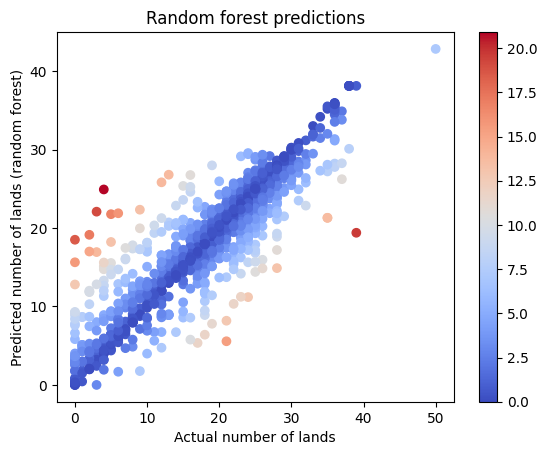

In [17]:
# Calculate the absolute difference between the predicted and actual values for the random forest model
diff_rf = np.abs(y_test_pred - y_test)

# Convert the diff_rf array to a Pandas DataFrame and then to a Series with length of 1860
diff_rf_series = pd.DataFrame(diff_rf).squeeze()

# Create a scatter plot of the predicted values versus the actual values, color-coded by the absolute difference
plt.scatter(y_test, y_test_pred, c=diff_rf_series, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Actual number of lands')
plt.ylabel('Predicted number of lands (random forest)')
plt.title('Random forest predictions')
plt.show()

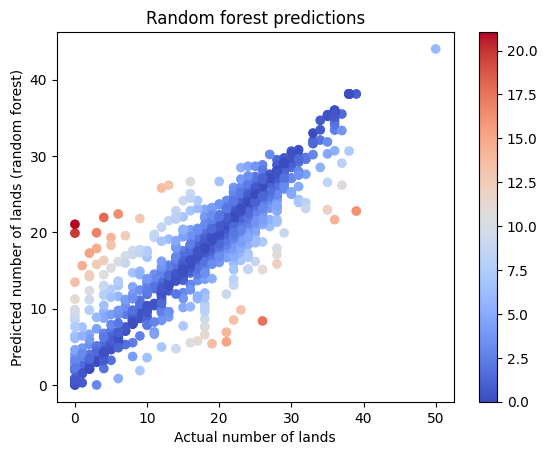

In [21]:
# Calculate the absolute difference between the predicted and actual values for the random forest model
diff_rf = np.abs(y_test_pred - y_test)

# Convert the diff_rf array to a Pandas DataFrame and then to a Series with length of 1860
diff_rf_series = pd.DataFrame(diff_rf).squeeze()

# Create a scatter plot of the predicted values versus the actual values, color-coded by the absolute difference
plt.scatter(y_test, y_test_pred, c=diff_rf_series, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Actual number of lands')
plt.ylabel('Predicted number of lands (random forest)')
plt.title('Random forest predictions')
plt.show()

In [24]:
# Save the compressed model to disk
fp = os.path.join(parent_dir, 'rf_lin_poly_model.joblib.z')
dump(rf_model_poly, fp, compress=True)

['C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/rf_lin_poly_model.joblib.z']